<a href="https://colab.research.google.com/github/kkiprono4/Titanic/blob/main/MOD2WK_7MON_decision_tree_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question
## Specifying the Question
You have been tasked to create a model that can predict the survival of a person using the given information on the titanic ship.
## Defining the metrics for success
Creation of a model to accurately predict survival in a titanic 
## Recording the experiment design
We shall perform the following tasks:
* Imports and Data Summaries
* Data cleaning
* Univariate , Bivariate and Multivariate
* Feature importance
* Multicollinearity
* Decision tree classifier


# Importing libraries

In [1]:
#Import the libraries to be used
#Numpy is a library for python that supports multidimensional arrays and matrices as well as mathematical functions
import numpy as np
#Pandas is Python library used for data manipulation and data analysis
import pandas as pd
#Matplotlib is a python library utilised in plotting and its numerical capabilities
import matplotlib.pyplot as plt
#Seaborn is a Python data visualisation library basrd on matplotlib.
import seaborn as sns

# Loading dataset

In [2]:
#loading dataset
df = pd.read_csv("titanic.csv")
df.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [3]:
#inspecting the last 10 items in the results Dataset
df.tail()

PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
886          887         0       2  ...  13.00   NaN         S
887          888         1       1  ...  30.00   B42         S
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[5 rows x 12 columns]

In [4]:
#dropping columns that we won't be using
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [5]:
#checking the first 5 records
df.head(5)

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

In [6]:
#dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


* 2 integer variables
* 1 string variable
* 2 float variables

In [7]:
#dataset shape
df.shape

(891, 5)

891 records and 5 variables

In [8]:
#summary statistics
df.describe()

Survived      Pclass         Age        Fare
count  891.000000  891.000000  714.000000  891.000000
mean     0.383838    2.308642   29.699118   32.204208
std      0.486592    0.836071   14.526497   49.693429
min      0.000000    1.000000    0.420000    0.000000
25%      0.000000    2.000000   20.125000    7.910400
50%      0.000000    3.000000   28.000000   14.454200
75%      1.000000    3.000000   38.000000   31.000000
max      1.000000    3.000000   80.000000  512.329200

# Data Cleaning

In [9]:
#checking for duplicates
df.duplicated().sum()

123

123 duplicates

In [10]:
# Dealing with the duplicate values 
# We will delete the identified duplicates
df = df.drop_duplicates(keep = 'first')
# Confirm the changes 
df.duplicated().sum()

0

In [11]:
#checking the new shape
df.shape

(768, 5)

768 records and 5 variables

In [12]:
# Checking for null values
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         98
Fare         0
dtype: int64

Age has 98 missing values which is 12% of the data so I won't drop

In [13]:
df['Age'].value_counts()

24.00    29
18.00    25
22.00    22
28.00    22
30.00    22
         ..
36.50     1
0.92      1
23.50     1
55.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [14]:
df['Age'].mean()

29.824507462686565

In [15]:
#We replaced the missing values with mean in the age column
nulls='29.00'
df['Age'].fillna(nulls,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [16]:
# Confirming the changes
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [17]:
#convert age from float to integer
#df['Age'] = df['Age'].astype(int)

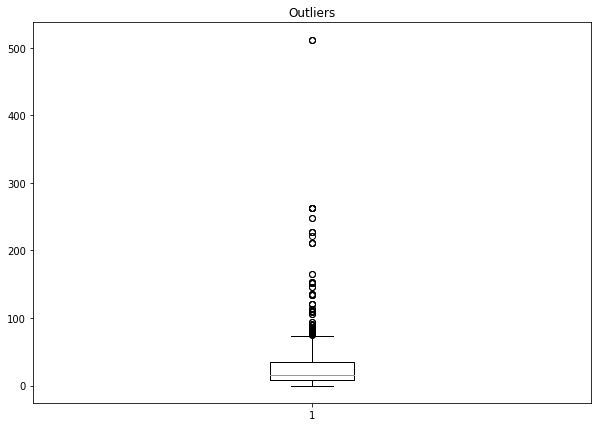

In [18]:
# We will check for outliers in our fare column
fig = plt.figure(figsize = (10,7))
plt.boxplot(df['Fare'])
plt.title('Outliers')
plt.show()

presence of outliers but won't drop it represents real data

# Exploratory Data Analysis

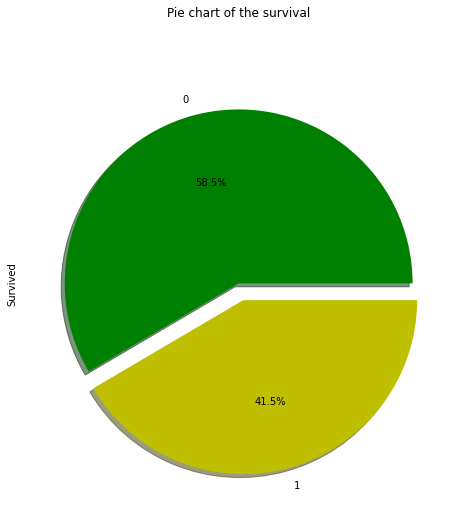

In [19]:
#Categorical variables
# Pie chart for survived
df['Survived'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['g','y'],figsize=(10,8),autopct='%1.1f%%')
plt.title("Pie chart of the survival", y=1.1)
plt.show()

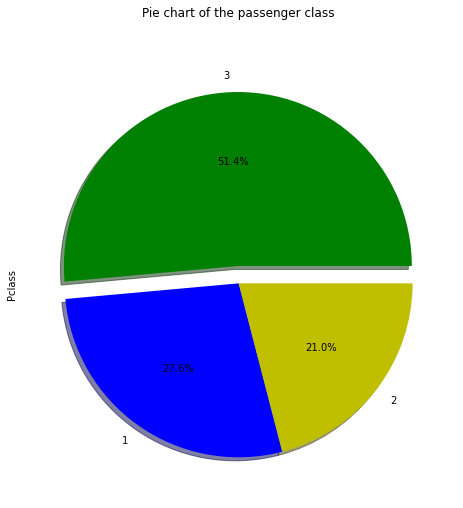

In [20]:
# Pie chart for passenger class
df['Pclass'].value_counts().plot(kind='pie',shadow = True,explode=(0.1,0,0), colors=['g','b','y'],figsize=(10,8),autopct='%1.1f%%')
plt.title("Pie chart of the passenger class", y=1.1)
plt.show()

Most passenger were in the passenger class 3 which had 51.4% representation

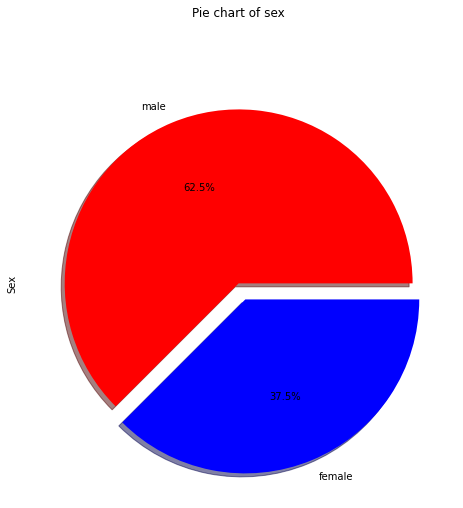

In [21]:
# Pie chart for sex
df['Sex'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['r','b'],figsize=(10,8),autopct='%1.1f%%')
plt.title("Pie chart of sex", y=1.1)
plt.show()

62.5% represents Male and 37.5% represents female passengers in the titanic

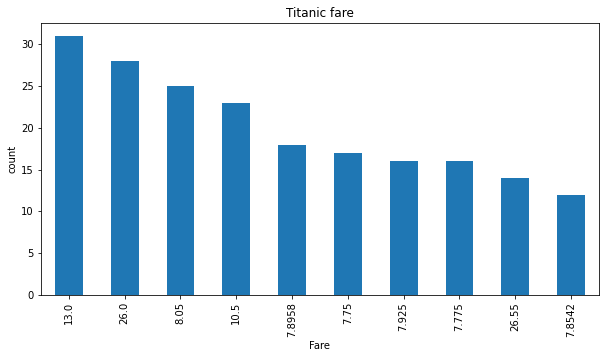

In [22]:
plt.figure(figsize = (10,5))
df['Fare'].value_counts().head(10).plot.bar()
plt.title('Titanic fare')
plt.xlabel('Fare')
plt.ylabel('count')
plt.show()

In [23]:
# Checking the median, mode, varaince, skewness and kurtosis of our dataframe
n_col =  df[['Fare']]
for i in n_col:
  print('The median of', i, 'is:')
  print(df[i].median())
  print('The mode of', i, 'is:')
  print(df[i].mode())
  print('The variance of', i, 'is:')
  print(df[i].var())
  print('The skewness of', i, 'is:')
  print(df[i].skew())
  print('The kurtosis of', i, 'is:')
  print(df[i].kurt())

The median of Fare is:
16.05
The mode of Fare is:
0    13.0
dtype: float64
The variance of Fare is:
2765.401552901478
The skewness of Fare is:
4.534493450699764
The kurtosis of Fare is:
29.692627289922697


In [24]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [25]:
# Encode tournament and Status columns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [26]:
# Asses correlation between our variables 
df.corr()

Survived    Pclass       Sex      Fare
Survived  1.000000 -0.336302 -0.509632  0.247346
Pclass   -0.336302  1.000000  0.118150 -0.551271
Sex      -0.509632  0.118150  1.000000 -0.171164
Fare      0.247346 -0.551271 -0.171164  1.000000

In [27]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

# Multivariate Analysis

## Linear Discriminant Analysis (LDA)

In [28]:
# We will start by separating our data into independent and dependent variables
X = df.drop('Survived', axis =1)
y = df['Survived']

In [29]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [30]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X, y)
lda_feat = lda_. transform(X)

#displaying the coefficients of the reducted columns
lda.coef_

array([[-1.22436420e+00, -2.96642060e+00, -3.39398223e-02,
        -6.52806372e-05]])

# Feature Importance

In [31]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

0
Fare   -0.000065
Age    -0.033940
Pclass -1.224364
Sex    -2.966421

# Multicollinearlity

In [32]:
# Check for multicollinearlity
# we first calculate the correlation coefficients
corr = X.corr()

In [33]:
# We derive the VIF
vif= pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

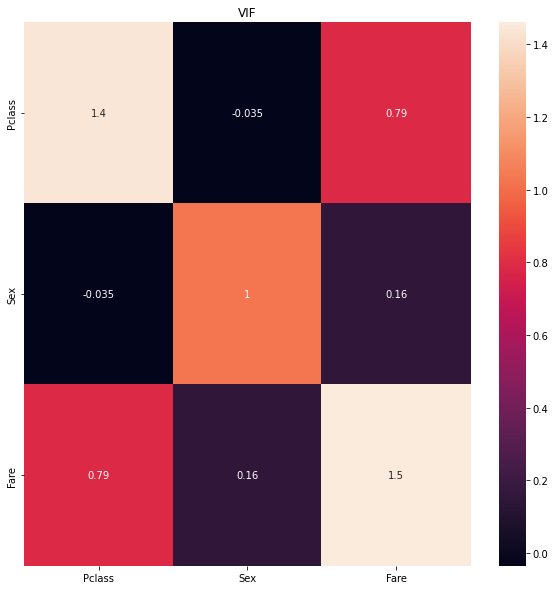

In [34]:
# Use a heatmap to display our results
plt.figure(figsize= (10,10))
sns.heatmap(vif, annot = True)
plt.title('VIF')
plt.show()

All the variables have VIF of below 5

# Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone survived , so let's use that column as our Y 
y = df['Survived'].values

test_features = ['Fare','Age','Pclass','Sex']
# We should be able to use  all the other features.
X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [36]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 75.97402597402598


In [37]:
tree.score(X,y)

0.9309895833333334

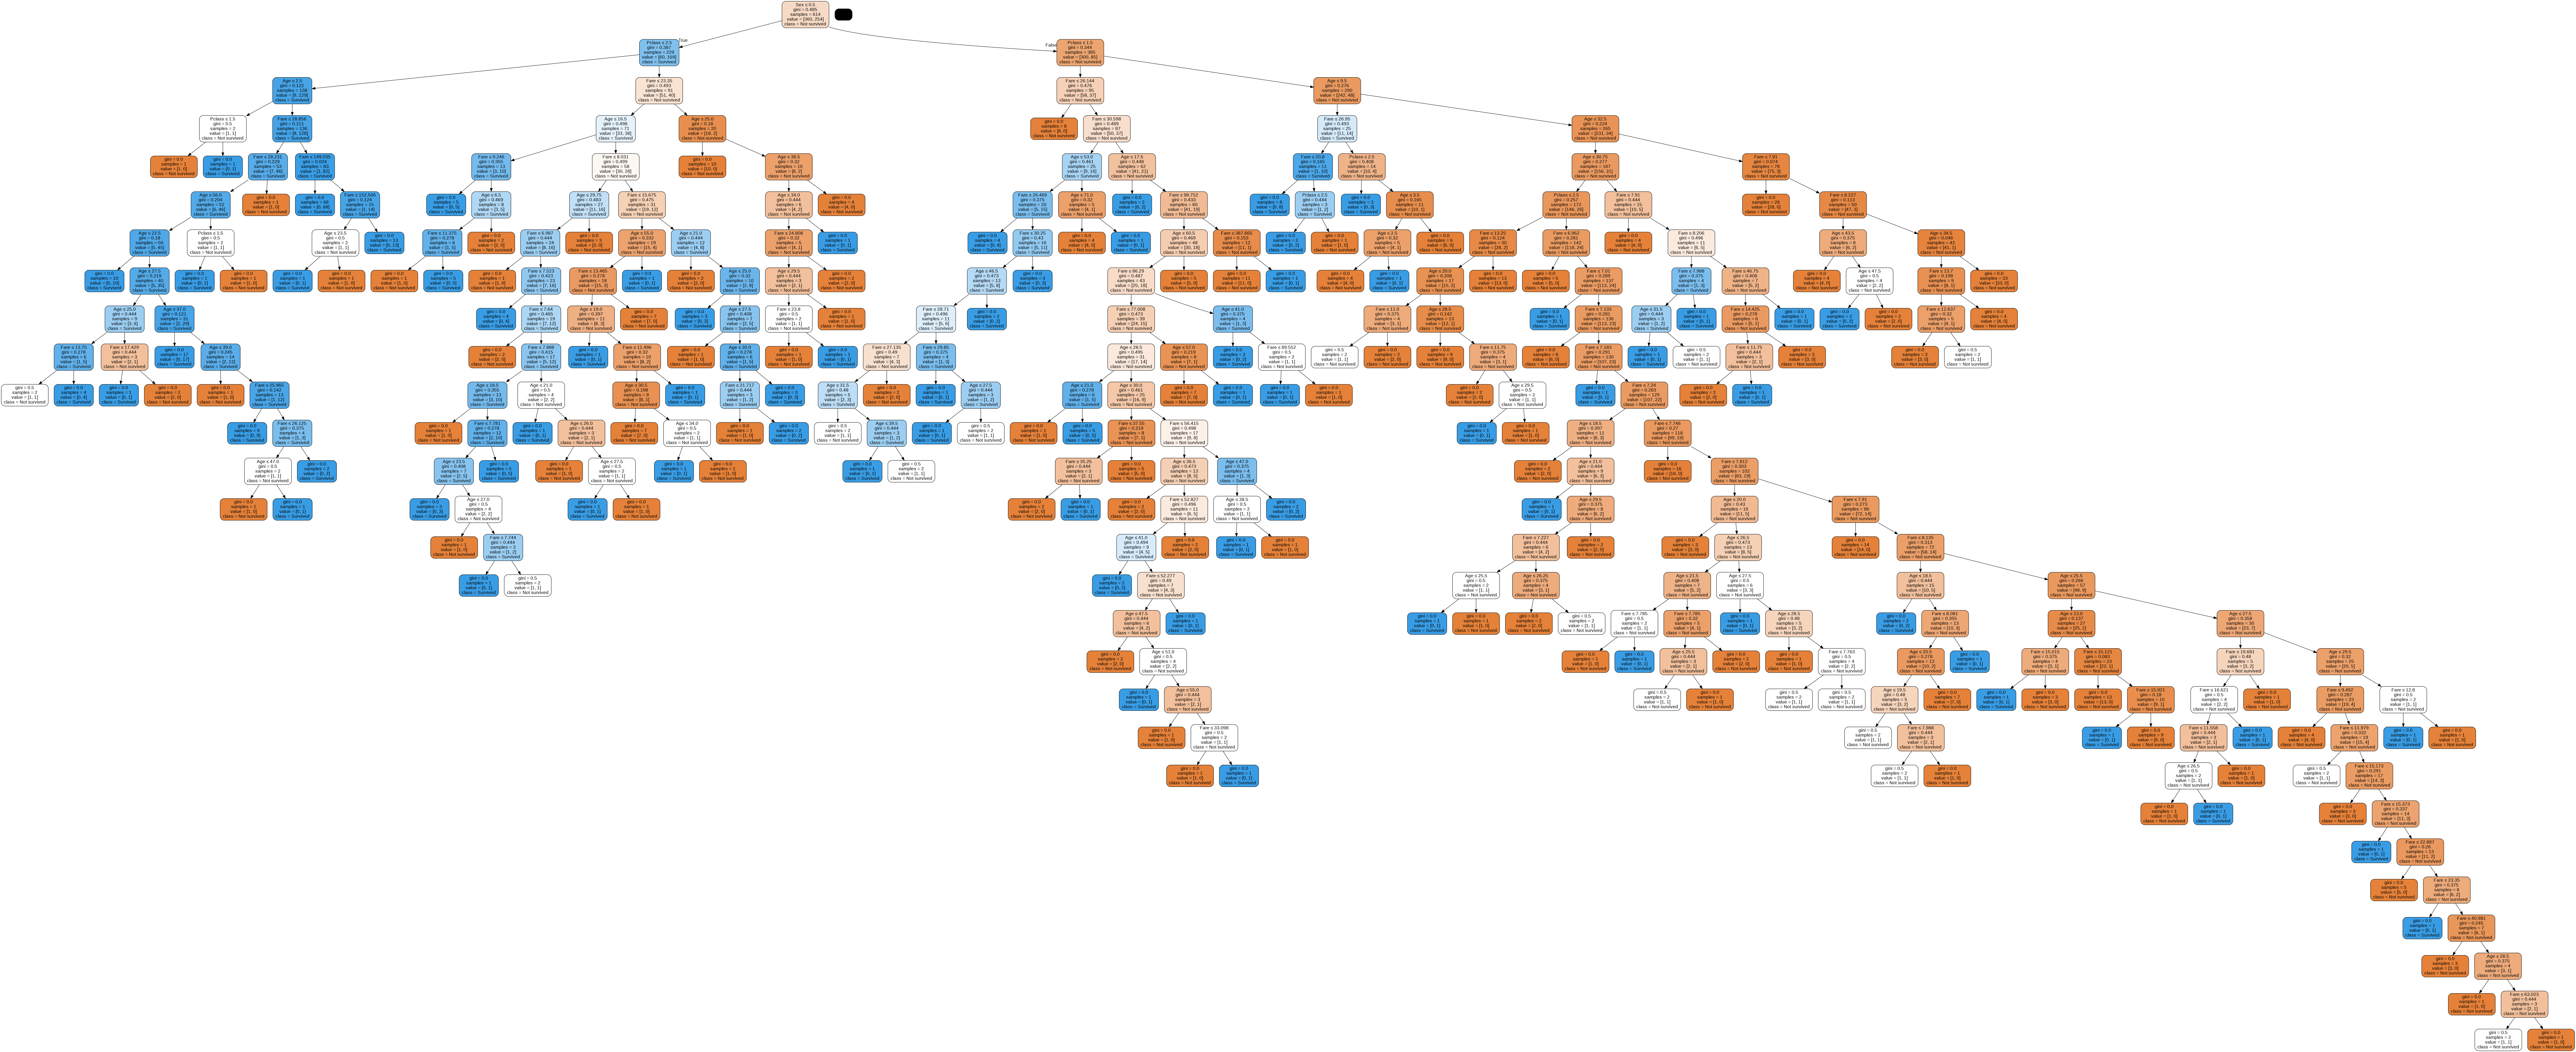

In [38]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO 
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Not survived', 'Survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('survived.png')
Image(graph.create_png())